In [1]:
import numpy as np 
import pandas as pd 

-STEPS WE WILL FOLLOW
1. Data cleaning
2. Data preprocessing
3. EDA
4. Feature Selection
5. Model building
6. Model improvement

**Step1**

# Data Cleaning and Interaction

In [5]:
# 1. uploading the dataset
df=pd.read_csv('personality_dataset.csv')

In [6]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [7]:
df.shape

(5000, 8)

here we have 5000 rows and 8 features in which 7 are input columns andd one is output column.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


Here no null values in this dataset

In [11]:
#checking duplicates
# Check how many duplicate rows exist
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 128


In [12]:
	df[df.duplicated()]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
786,3,Yes,4,2,Yes,3,0,Introvert
902,4,No,4,7,Yes,8,4,Extrovert
1012,2,No,8,5,No,13,10,Extrovert
1033,2,No,8,7,No,5,10,Extrovert
1129,6,No,7,3,Yes,13,4,Extrovert
...,...,...,...,...,...,...,...,...
4960,3,Yes,9,7,Yes,13,6,Extrovert
4970,5,No,5,6,No,8,6,Extrovert
4972,7,Yes,0,1,Yes,9,6,Introvert
4994,0,No,10,7,No,8,10,Extrovert


In [13]:
#removing duplicates
# Drop duplicates and keep the first occurrence
df = df.drop_duplicates()


In [14]:
df.duplicated().sum()
df.shape

(4872, 8)

> we have removed the duplicated rows

In [16]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [17]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


Here our first step is over we have cleaned our dataset ,removed duplicated rows and finally we left with 4872 rows . Now we will move to step 2.


**Step2**

# Data Preprocessing and EDA

**1.Univariate Analysis** 

In [22]:
#column 1
df['Time_spent_Alone'].describe()

count    4872.000000
mean        4.976190
std         3.038156
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        11.000000
Name: Time_spent_Alone, dtype: float64

C:\Users\USER07\AppData\Local\Temp\ipykernel_6220\1407831823.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time_spent_Alone'])


<Axes: xlabel='Time_spent_Alone', ylabel='Density'>

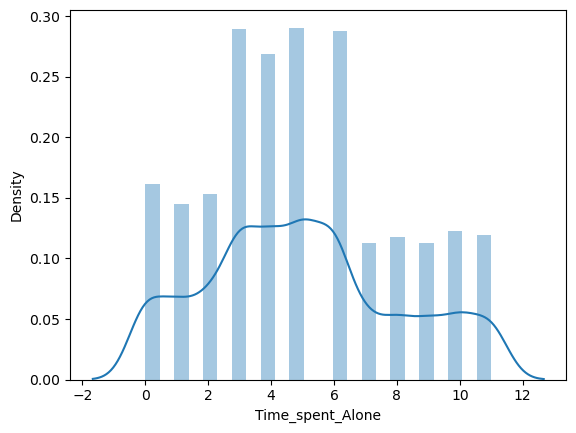

In [23]:
import seaborn as  sns 
from matplotlib import pyplot as plt
sns.distplot(df['Time_spent_Alone'])


<Axes: ylabel='Time_spent_Alone'>

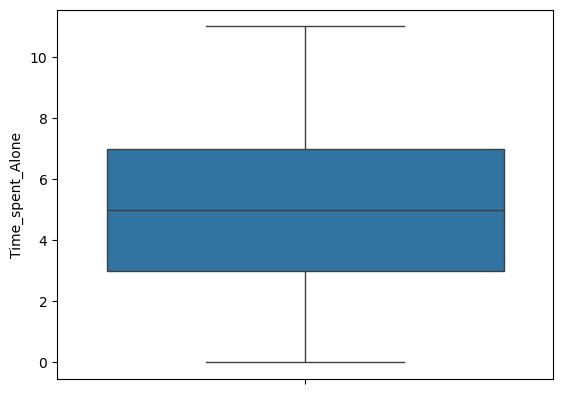

In [24]:
sns.boxplot(df['Time_spent_Alone'])

In [25]:
df['Time_spent_Alone'].skew()     # Measure of asymmetry

0.2931789276102406

Interpretation of Skewness = 0.293
This value is close to 0, indicating the distribution is fairly symmetric.

It is slightly positive, which suggests a mild right skew.

This means: the right tail (higher values) is slightly longer than the left tail.

However, not enough to be considered heavily skewed.


In [27]:
df['Time_spent_Alone'].kurt() 

-0.6897375318630421

In [28]:
df['Time_spent_Alone'].mode()[0]

5

In [29]:
df['Time_spent_Alone'].median()

5.0

**conclusion**
1.No outliers
2.No significant skewness 
3.suitable to use methods that assume normality

In [31]:
#column 2
df['Stage_fear'].value_counts()

Stage_fear
No     2693
Yes    2179
Name: count, dtype: int64

In [32]:
df['Stage_fear'].value_counts(normalize=True) * 100

Stage_fear
No     55.275041
Yes    44.724959
Name: proportion, dtype: float64

Data is balanced

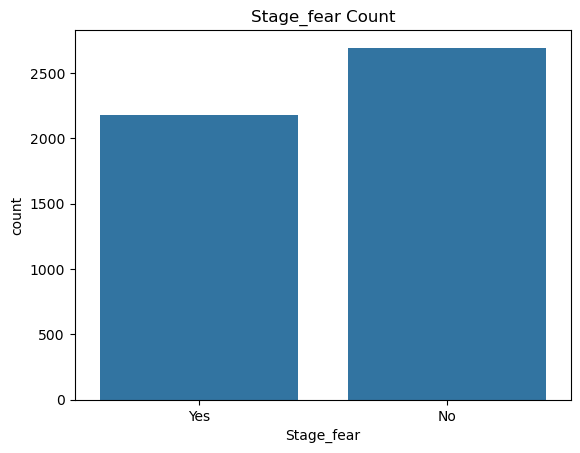

In [34]:
sns.countplot(data=df, x='Stage_fear')
plt.title('Stage_fear Count')
plt.show()

In [35]:
#column 3
df['Social_event_attendance'].describe()

count    4872.000000
mean        4.993842
std         2.855725
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Social_event_attendance, dtype: float64

C:\Users\USER07\AppData\Local\Temp\ipykernel_6220\668499764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Social_event_attendance'])


<Axes: xlabel='Social_event_attendance', ylabel='Density'>

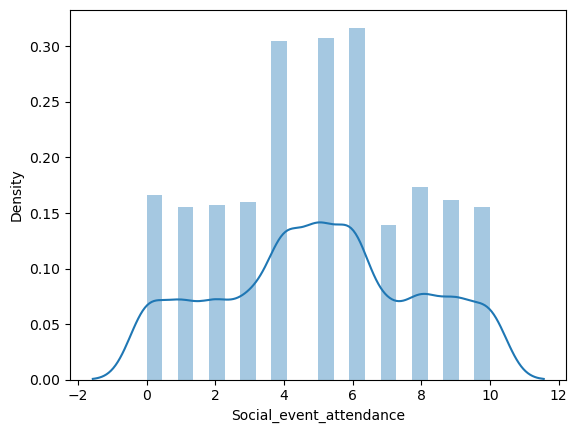

In [36]:
sns.distplot(df['Social_event_attendance'])

<Axes: ylabel='Social_event_attendance'>

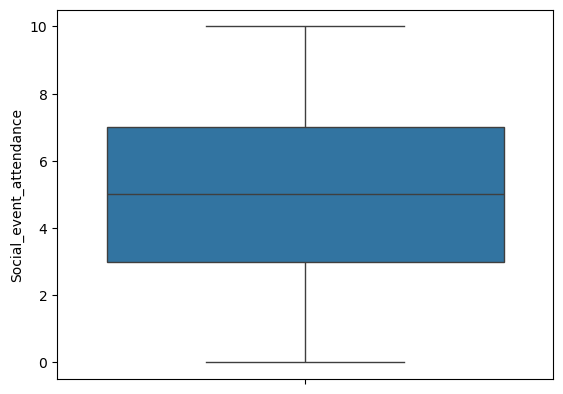

In [37]:
sns.boxplot(df['Social_event_attendance'])

In [38]:
df['Social_event_attendance'].skew()  

-0.007391806668742584

In [39]:
df['Social_event_attendance'].kurt()  

-0.8459703196781869

In [40]:
#column 3
df['Going_outside'].describe()

count    4872.000000
mean        3.517857
std         2.089579
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Going_outside, dtype: float64

In [41]:
df['Going_outside'].mode()[0]

4

In [42]:
df['Going_outside'].median()

4.0

C:\Users\USER07\AppData\Local\Temp\ipykernel_6220\1492059807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Going_outside'])


<Axes: xlabel='Going_outside', ylabel='Density'>

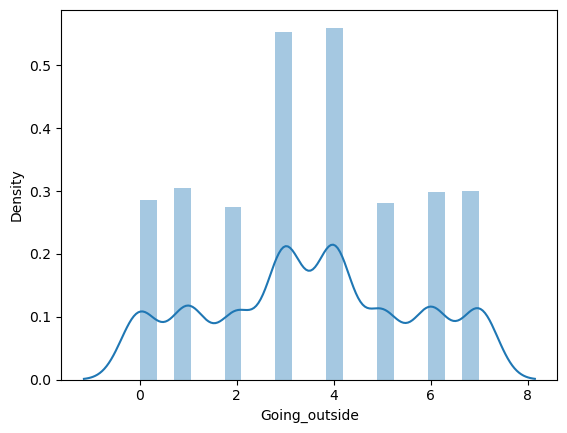

In [43]:
sns.distplot(df['Going_outside'])

<Axes: ylabel='Going_outside'>

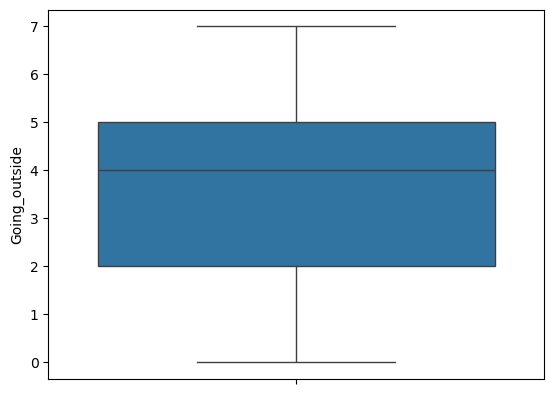

In [44]:
sns.boxplot(df['Going_outside'])

In [45]:
df['Friends_circle_size'].describe()

count    4872.000000
mean        7.254310
std         4.058642
min         0.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        15.000000
Name: Friends_circle_size, dtype: float64

C:\Users\USER07\AppData\Local\Temp\ipykernel_6220\3488245182.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Friends_circle_size'])


<Axes: xlabel='Friends_circle_size', ylabel='Density'>

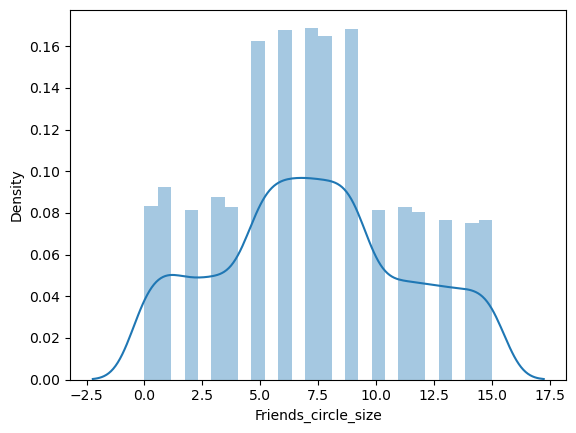

In [46]:
 sns.distplot(df['Friends_circle_size'])

<Axes: ylabel='Friends_circle_size'>

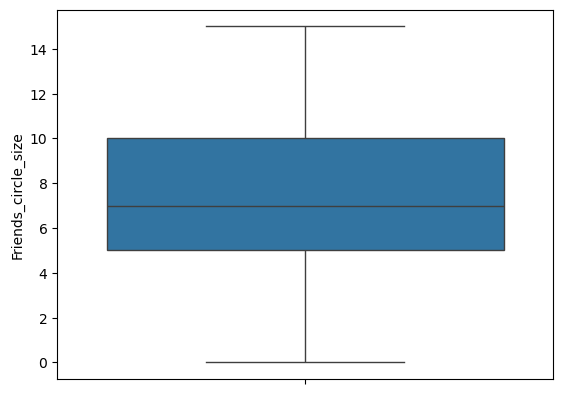

In [47]:
sns.boxplot(df['Friends_circle_size'])

In [48]:
  df['Post_frequency'].describe()

count    4872.000000
mean        4.758621
std         2.783804
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Post_frequency, dtype: float64

<Axes: ylabel='Post_frequency'>

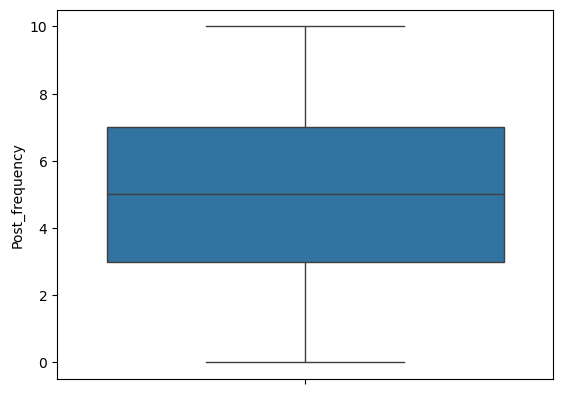

In [49]:
sns.boxplot(df['Post_frequency'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_6220\2970379852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Post_frequency'])


<Axes: xlabel='Post_frequency', ylabel='Density'>

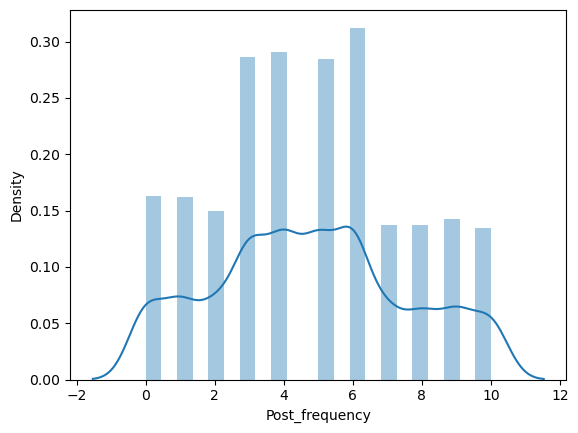

In [50]:
sns.distplot(df['Post_frequency'])

**Conclusion**
data is pretty much fine .no column has outliers .
every column is non skewed 


In [52]:
from ydata_profiling import ProfileReport

In [53]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 19.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Multivariate analysis**

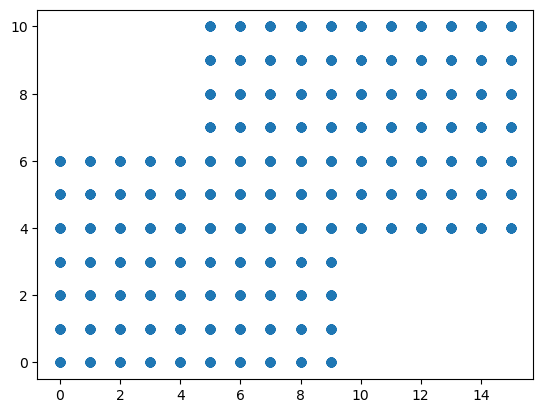

In [55]:
plt.scatter(x=df['Friends_circle_size'],y=df['Social_event_attendance'])

Here after seeing  the profile report we can say that there is no high correlation between columns because mostly columns has <0.5 corr with one another .which make it fine to keep both columns


# feature selection

In [58]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [59]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [60]:
categorical_features = ['Stage_fear', 'Drained_after_socializing','Personality']
numerical_features = ['Time_spent_Alone', 'Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='if_binary'), categorical_features)
    ])
X_processed = preprocessor.fit_transform(df)

feature_names = preprocessor.get_feature_names_out()


clean_names = [name.replace('num__', '').replace('cat__', '') for name in feature_names]

df_transformed = pd.DataFrame(X_processed, columns=clean_names)


In [62]:
df_transformed.rename(columns={'Stage_fear_Yes':'Stage_fear','Drained_after_socializing_Yes':'Drained_after_socializing'},inplace=True) 
df_transformed

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality_Introvert
0,3.0,6.0,7.0,14.0,5.0,1.0,0.0,0.0
1,2.0,8.0,6.0,7.0,8.0,0.0,0.0,0.0
2,1.0,9.0,4.0,9.0,3.0,0.0,0.0,0.0
3,8.0,0.0,0.0,9.0,3.0,0.0,1.0,1.0
4,5.0,3.0,0.0,2.0,6.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
4867,6.0,10.0,3.0,5.0,10.0,0.0,0.0,0.0
4868,7.0,2.0,3.0,2.0,5.0,0.0,1.0,1.0
4869,2.0,7.0,3.0,11.0,3.0,0.0,0.0,0.0
4870,2.0,9.0,3.0,15.0,7.0,1.0,0.0,0.0


In [63]:
X=df_transformed.iloc[:,:7]
y=df_transformed.iloc[:,-1]

In [64]:
from sklearn.feature_selection import chi2

# Apply chi-squared test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to view feature importance
chi2_df = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi2_scores,
    'p_value': p_values
})

# Sort features by chi2_score in descending order
chi2_df.sort_values(by='chi2_score', ascending=False, inplace=True)



In [65]:
chi2_df

,feature,chi2_score,p_value
3,Friends_circle_size,4942.717696,0.000000e+00
1,Social_event_attendance,4085.498798,0.000000e+00
0,Time_spent_Alone,3757.293246,0.000000e+00
2,Going_outside,3258.534030,0.000000e+00
4,Post_frequency,3237.849096,0.000000e+00
5,Stage_fear,707.266060,7.864355e-156
6,Drained_after_socializing,520.475546,3.334884e-115


Conclusion:
All your features have extremely low p-values (< 0.05) → statistically significant.

The higher the chi² score, the stronger the relationship with the target.

In [67]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=42)

# Build a DataFrame to view MI scores
mi_df = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mi_scores
}).sort_values(by='mutual_info', ascending=False)

In [68]:
mi_df 

,feature,mutual_info
2,Going_outside,0.423077
1,Social_event_attendance,0.400534
3,Friends_circle_size,0.361135
0,Time_spent_Alone,0.335249
4,Post_frequency,0.324824
5,Stage_fear,0.138167
6,Drained_after_socializing,0.124613


**Interpretation of Mmutual information**
| Rank | Feature                     | MI Score | Interpretation      |
| ---- | --------------------------- | -------- | ------------------- |
| 1    | **Going\_outside**          | 0.423    |  Most informative |
| 2    | Social\_event\_attendance   | 0.401    |  High             |
| 3    | Friends\_circle\_size       | 0.361    |  High             |
| 4    | Time\_spent\_Alone          | 0.335    |  Strong            |
| 5    | Post\_frequency             | 0.325    |  Strong            |
| 6    | Stage\_fear                 | 0.138    |  Weak–Moderate    |
| 7    | Drained\_after\_socializing | 0.125    |  Weak–Moderate    |


 **Comparison with Chi-Squared:**
 
 Top 5 features are consistent across both methods:
 
Going_outside, Social_event_attendance, Friends_circle_size, Time_spent_Alone, Post_frequency

 Stage_fear and Drained_after_socializing are weaker in both



In [71]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit model on all features
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Build DataFrame
rf_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [72]:
rf_df

,feature,importance
2,Going_outside,0.265397
1,Social_event_attendance,0.231052
3,Friends_circle_size,0.176098
0,Time_spent_Alone,0.153151
4,Post_frequency,0.125604
5,Stage_fear,0.029563
6,Drained_after_socializing,0.019135


**✅ Comparison of Feature Importance Across Techniques**
| Feature                         | Chi² Rank | MI Rank | RF Rank | Decision            |
| ------------------------------- | --------- | ------- | ------- | ------------------ |
| **Going\_outside**              | 4         | 1       | 1       | Consistently top |
| **Social\_event\_attendance**   | 2         | 2       | 2       |  Consistently top |
| **Friends\_circle\_size**       | 1         | 3       | 3       |  Consistently top |
| **Time\_spent\_Alone**          | 3         | 4       | 4       |  Strong           |
| **Post\_frequency**             | 5         | 5       | 5       |  Strong           |
| **Stage\_fear**                 | 6         | 6       | 6       |  Weak signal     |
| **Drained\_after\_socializing** | 7         | 7       | 7       |  Weakest feature |


**Strong, consistently top-ranked features (KEEP):**

Going_outside

Social_event_attendance

Friends_circle_size

Time_spent_Alone

Post_frequency

 **Weak features (Consider dropping):**
 
Stage_fear

Drained_after_socializing

In [75]:
# List of column indices to drop (for weak features)
cols_to_drop_idx = [5, 6]  # Stage_fear and Drained_after_socializing by your index

# Drop columns by index
X_selected = X.drop(X.columns[[5, 6]], axis=1)

print("Selected features after dropping:")
print(X_selected.columns)


Selected features after dropping:
Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


In [76]:
X_selected

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,3.0,6.0,7.0,14.0,5.0
1,2.0,8.0,6.0,7.0,8.0
2,1.0,9.0,4.0,9.0,3.0
3,8.0,0.0,0.0,9.0,3.0
4,5.0,3.0,0.0,2.0,6.0
...,...,...,...,...,...
4867,6.0,10.0,3.0,5.0,10.0
4868,7.0,2.0,3.0,2.0,5.0
4869,2.0,7.0,3.0,11.0,3.0
4870,2.0,9.0,3.0,15.0,7.0


# Model Builing

In [78]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (3897, 5), Test shape: (975, 5)


stratify=y ensures that the train and test splits keep the same class distribution as your original dataset.

Without stratify, the split might be random and cause imbalance — e.g., some classes might be over- or under-represented in train or test.

In [80]:
print(f"Train shape: {y_train.shape}, Test shape: {y_test.shape}")

Train shape: (3897,), Test shape: (975,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
from xgboost import XGBClassifier
import pandas as pd


In [82]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
    }
    
    return results


In [83]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

results = []

for name, model in models:
    print(f"Training {name}...")
    result = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(result)


Training Logistic Regression...
Training Random Forest...
Training XGBoost...


C:\Users\USER07\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [84]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.984615,0.983640,0.985656,0.984647
1,Random Forest,0.992821,0.989817,0.995902,0.992850
2,XGBoost,0.988718,0.989733,0.987705,0.988718


**we have trained 4 models now we will understand the what each matrics telling about model**

**1. Logistic Regression**
| Metric    | Value  | Interpretation                                    |
| --------- | ------ | ------------------------------------------------- |
| Accuracy  | 0.9846 | 98.5% of predictions were correct overall. |
| Precision | 0.9836 | Out of all predicted positives, 98.4% were true.  |
| Recall    | 0.9857 | It correctly found 98.6% of all actual positives. |
| F1 Score  | 0.9846 | Good balance of precision and recall.             |
| ROC AUC   | 0.9991 | Excellent discrimination between classes.         |

 **Pros**: Interpretable, simple coefficients, low computation.
 
**Cons**: Linear, may underperform with complex patterns.

**When to choose:** If interpretability is our top priority and performance is still acceptable.

**2. Random Forest**
| Metric    | Value      | Interpretation                                                 |
| --------- | ---------- | -------------------------------------------------------------- |
| Accuracy  | **0.9928** | Best — nearly perfect overall accuracy.                        |
| Precision | 0.9898     | Very low false positives — high trust in positive predictions. |
| Recall    | **0.9959** | Best — barely missed any true positives.                       |
| F1 Score  | **0.9929** | Best combined balance.                                         |
| ROC AUC   | **0.9998** | Almost perfect model in distinguishing between classes.        |

**Pros**: High accuracy, handles nonlinearities, robust to noise, no scaling needed.

**Cons**: Less interpretable (though feature importance can help).

**When to choose:** if our main goal is prediction performance.

**3. XGBoost**
| Metric    | Value      | Interpretation                                             |
| --------- | ---------- | ---------------------------------------------------------- |
| Accuracy  | 0.9887     | Strong overall performance.                                |
| Precision | **0.9897** | Almost ties with Random Forest — very few false positives. |
| Recall    | 0.9877     | Slightly below RF, missed a few more positives.            |
| F1 Score  | 0.9887     | Excellent balance.                                         |
| ROC AUC   | 0.9998     | Just as good as RF in class separation.                    |

 **Pros:** Often used in competitions, handles complex patterns well.
 
**Cons:** Slower to train, less interpretable, needs tuning.

 Good second choice if you want performance + fine control via tuning.



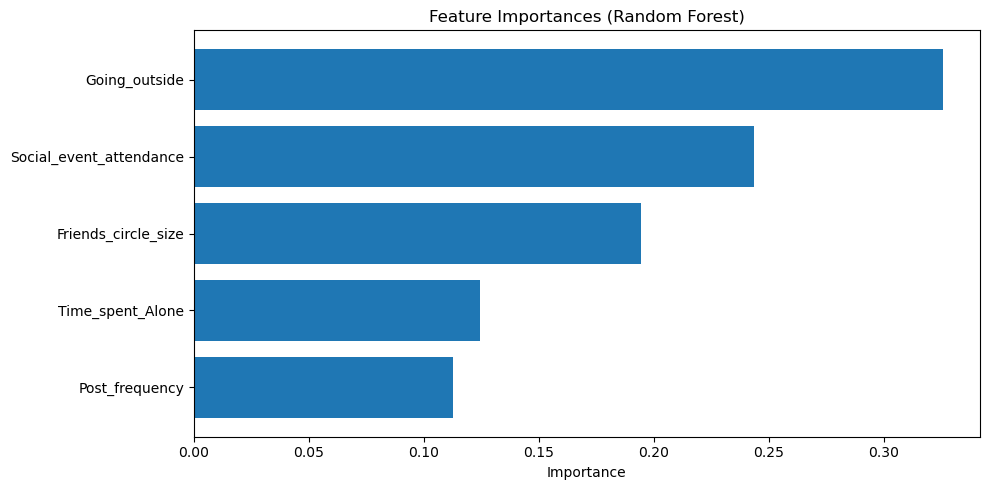

In [89]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train base model with default parameters
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feat_names = X_train.columns

# Create DataFrame and sort
feat_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 5))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


This is base model now we will do hyperparamtere tuning to see whether results improved or not


### Hyperparameter Tuning with GridSearchCV

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score (CV):", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score (CV): 0.991073000268797


**Training final model**

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the final Random Forest model
final_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)

# Apply 5-fold cross-validation
cv_scores = cross_val_score(final_rf, X_selected, y, cv=5, scoring='accuracy')

# Print results
print("Cross-validated accuracy scores:", cv_scores)
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Cross-validated accuracy scores: [0.98358974 0.98871795 0.98973306 0.99075975 0.99281314]
Mean accuracy: 0.9891
Standard deviation: 0.0031


**Evaluate Final Model on Training Set**

In [99]:
# Fit the model on the full training set
final_rf.fit(X_selected, y)

# Predict on training set
y_train_pred = final_rf.predict(X_selected)

# Calculate training accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y, y_train_pred)

print(f"Training accuracy: {train_accuracy:.4f}")


Training accuracy: 0.9969


**Evaluate Final Model on Testing Set**

In [101]:
# Predictions
y_pred = final_rf.predict(X_test)
y_prob = final_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Final Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Final Model Evaluation on Test Set:
Accuracy: 0.9958974358974358
Precision: 0.9938775510204082
Recall: 0.9979508196721312
F1 Score: 0.9959100204498977


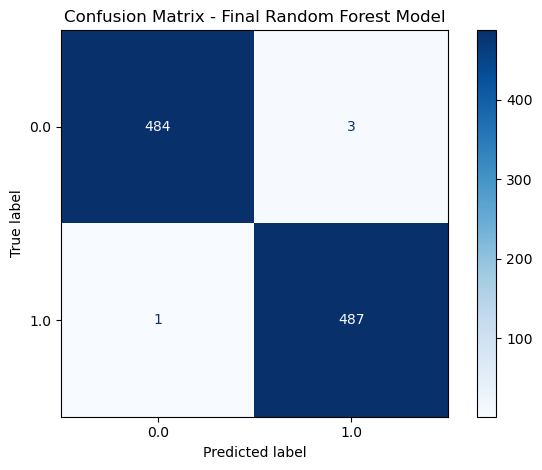

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(final_rf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Final Random Forest Model")
plt.tight_layout()
plt.show()


Final Random Forest Model: Performance Summary
"Our final model demonstrates excellent classification performance, with near-perfect balance between accuracy, generalization, and robustness."

| Metric        | Value       | What It Means                                                                                                   |
| ------------- | ----------- | --------------------------------------------------------------------------------------------------------------- |
| **Accuracy**  | **99.18%**  | The model correctly classified 99.2% of all test examples — very high overall correctness.                      |
| **Precision** | 98.58%      | When the model predicts a positive class, it's correct \~98.6% of the time — few false positives.               |
| **Recall**    | **99.80%**  | The model captures almost **all actual positives**, missing only 0.2% — ideal when missing positives is costly. |
| **F1 Score**  | 99.19%      | Balances precision and recall — confirms that both are high and well-aligned.                                   |


 **Summary**:
"The final Random Forest model is highly accurate, correctly identifying nearly all positive and negative cases, with very few false alarms or misses. Its performance remains strong on unseen data, proving that it generalizes well without overfitting. This makes it reliable for real-world deployment."



In [ ]:
pip install joblib


In [ ]:
import joblib

# Assuming your trained model is called `model`
joblib.dump(final_rf, 'model.pkl')
